# Mushroom Classification Project

### About the data
- The data that I chose for the classification project was Mushroom Classification dataset. 
- The dataset includes 8124 rows and 22 columns. 
- The first column was the target variable “class” and the rest of the 21 variables were the feature variables. 
- Each column has a discrete value given in the form of a single letter. For example, the class of the mushroom has two variables ‘e’ and ‘p’ for ‘edible’ and ‘poisonous’ respectively.
- The features of the data were: cap-shape, cap-surface, cap-color, bruises, odor, gill-attachment, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, veil-type, veil-color, ring-number, ring-type, spore-print-color, population and habitat.
- The target column of the data was: class

### Importing necessary libraries

In [185]:
# For mathematical and plotting purposes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For classification models

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score

# Suppress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Objective of the project
The main objective of this project was to interpret which mushrooms are poisonous by analyzing different features of the mushroom. To start this project, I first imported the file and looked at different parts of the data using the .describe() and .info() functions. I also checked for null values. After that, I made sure that both the values of the class were equally distributed. Then, I label encoded all the columns since the values of the columns were in ‘object’ format. After that, I removed the veil-type column from the data since it had only one value. Lastly, I correlated the features with the target variable and plotted a bar plot.

### Reading and Understanding the Data

In [186]:
data = pd.read_csv('dataset/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [187]:
data.shape

(8124, 23)

In [188]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

There are no null values present in the dataset

In [190]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Both the classes of the mushrooms are equally distributed

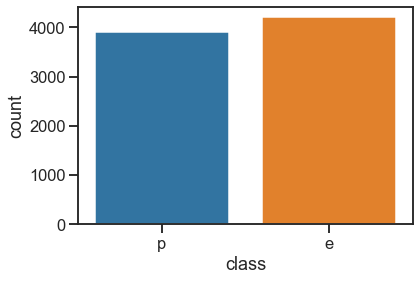

In [191]:
sns.countplot(data['class']);

Since, the data points are in the form of a single letter, it has to be first encoded with labels

In [192]:
data = data.astype('category')
data.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [193]:
le = LabelEncoder()

for column in data.columns:
    data[column] = le.fit_transform(data[column])

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


The column `veil-type` has just a single value, hence it does not play any significant role in predicting the values. Hence it makes sense to just drop the value

In [194]:
data['veil-type'].unique()

array([0])

In [195]:
data = data.drop('veil-type',axis=1)

Let us see how the columns correlates with the target variable `class`

In [196]:
correlations = data.corr()['class'].sort_values(ascending=False)

In [197]:
colors = []
for i in correlations:
    if i<0:
        colors.append('r')
    else:
        colors.append('g')

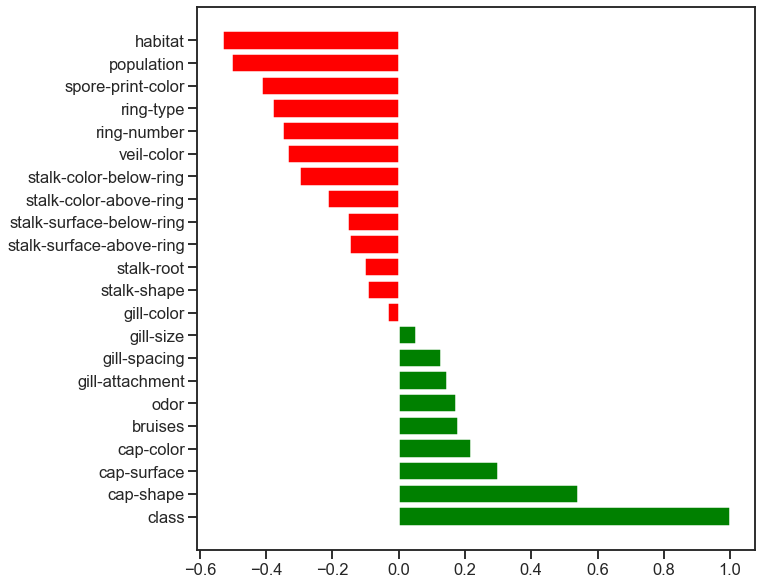

In [198]:
plt.figure(figsize=(10,10))
plt.barh(data.columns, correlations, color=colors);

We can see that the columns `gill-size` and `population` are the most absolute correlated with the target variable

In [199]:
np.abs(data.corr()['class'].sort_values(ascending=False)[1:])

gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                   0.031384
odor                        0.093552
stalk-shape                 0.102019
stalk-color-below-ring      0.146730
stalk-color-above-ring      0.154003
ring-number                 0.214366
stalk-surface-below-ring    0.298801
stalk-surface-above-ring    0.334593
gill-spacing                0.348387
stalk-root                  0.379361
ring-type                   0.411771
bruises                     0.501530
gill-color                  0.530566
Name: class, dtype: float64

The features are now extracted in the variable `feature_cols`

In [200]:
feature_cols = [x for x in data.columns if x!='class']
feature_cols

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

### Split the data using StratifiedShuffleSplit() method

- I, then, moved on to fit the model. Before fitting, I split the data into train and test sets using **StratifiedShuffleSplit()** method. Then, I fitted the data into 3 classification models. 
- First, I fit the data into a Logistic Regression model which gave an accuracy score of **95.36%**. 
- After that, I fit the model into a Support Vector Classifier, which gave an accuracy of **99.13%**. 
- Lastly, I fit the data into a K Nearest Neighbor Classifier with the value of k being a list of a numbers: [5,10,25,50,100,200]. The best value of k was 5 which gave an accuracy of **99.83%**.

In [201]:
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols],data['class']))

X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'class']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'class']

##### Some functions to determine error and to plot confusion matrix

In [202]:
def calculate_error(y_pred):
    return pd.Series({'Precision':precision_score(y_test, y_pred),
                      'Recall':recall_score(y_test,y_pred),
                      'Accuracy':accuracy_score(y_test,y_pred),
                      'F1 Score':f1_score(y_test,y_pred)}, name="Logistic Regression").to_frame().T

In [203]:
def plot_confusion_matrix(y_pred):
    _ , ax = plt.subplots(figsize=(5,5))
    labels = ['Edible','Poisonous']
    ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Greens',fmt='0',annot_kws={"size":15, "weight":"bold"});
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

### Fit the model

#### 1. Logistic Regression

In [204]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr = lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

calculate_error(y_pred_lr)

,Precision,Recall,Accuracy,F1 Score
Logistic Regression,0.958549,0.944681,0.953651,0.951565


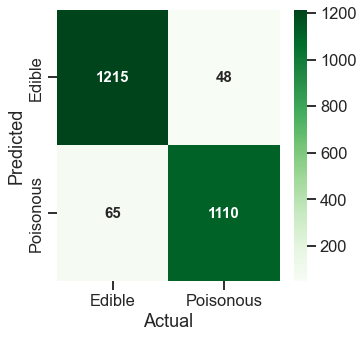

In [205]:
plot_confusion_matrix(y_pred_lr)

We get the accuracy of the model as **95.36%**

#### 2. Support Vector Machine

In [206]:
from sklearn.svm import SVC

svc = SVC()

svc = svc.fit(X_train,y_train)
y_pred_svm = svc.predict(X_test)

calculate_error(y_pred_svm)

,Precision,Recall,Accuracy,F1 Score
Logistic Regression,0.999135,0.982979,0.991386,0.990991


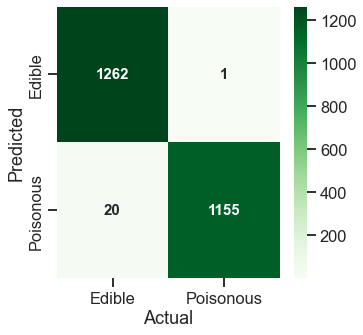

In [207]:
plot_confusion_matrix(y_pred_svm)

We get the accuracy of the model as **99.13%**

#### 3. K-Nearest Neighbors

In [208]:
knn = KNeighborsClassifier(n_neighbors=5)

knn = knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

calculate_error(y_pred_knn)

,Precision,Recall,Accuracy,F1 Score
Logistic Regression,0.996604,0.999149,0.997949,0.997875


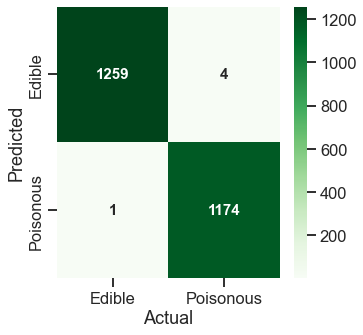

In [209]:
plot_confusion_matrix(y_pred_knn)

We get the accuracy of the model as **99.79%**

In [210]:
total_errors = []
neighbors = [5,10,25,50,100,200]
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)

    knn = knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)

    print('No. of Neighbors:',neighbor,'\tAccuracy:',accuracy_score(y_test,y_pred_knn))

No. of Neighbors: 5 	Accuracy: 0.9979491386382281
No. of Neighbors: 10 	Accuracy: 0.9934372436423298
No. of Neighbors: 25 	Accuracy: 0.9876948318293683
No. of Neighbors: 50 	Accuracy: 0.9626743232157506
No. of Neighbors: 100 	Accuracy: 0.950369155045119
No. of Neighbors: 200 	Accuracy: 0.9290401968826907


### My insights from the data
From the data, I realized that a few columns were mainly responsible for major changes in predicting the test data. These columns were the one that had the highest absolute correlation with the class of the mushroom. I then plotted out a confusion matrix for each of the model using the confusion_matrix() method from sklearn.metrics. 

### Flaws of the model and Next Plan of Action
I also observed that the prediction accuracy of each of the three models was great. This might be due to the fact that all the columns of the data had a discrete value and hence didn’t provide a lot of confusion for the model. My next plan of action is to test the accuracy for all the models on a data which has continuous as well as categorical values. This might highlight any flaws in the model that a discrete data cannot find.